# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [4]:
#получаем общую информацию а ванных
data.head(10)

total_images  last_price  total_area first_day_exposition  rooms  \
0            20  13000000.0      108.00  2019-03-07T00:00:00      3   
1             7   3350000.0       40.40  2018-12-04T00:00:00      1   
2            10   5196000.0       56.00  2015-08-20T00:00:00      2   
3             0  64900000.0      159.00  2015-07-24T00:00:00      3   
4             2  10000000.0      100.00  2018-06-19T00:00:00      2   
5            10   2890000.0       30.40  2018-09-10T00:00:00      1   
6             6   3700000.0       37.30  2017-11-02T00:00:00      1   
7             5   7915000.0       71.60  2019-04-18T00:00:00      2   
8            20   2900000.0       33.16  2018-05-23T00:00:00      1   
9            18   5400000.0       61.00  2017-02-26T00:00:00      3   

   ceiling_height  floors_total  living_area  floor is_apartment  studio  \
0            2.70          16.0        51.00      8          NaN   False   
1             NaN          11.0        18.60      1          NaN   False   
2             NaN           5.0        34.30      4          NaN   False   
3             NaN          14.0          NaN      9          NaN   False   
4            3.03          14.0        32.00     13          NaN   False   
5             NaN          12.0        14.40      5          NaN   False   
6             NaN          26.0        10.60      6          NaN   False   
7             NaN          24.0          NaN     22          NaN   False   
8             NaN          27.0        15.43     26          NaN   False   
9            2.50           9.0        43.60      7          NaN   False   

   open_plan  kitchen_area  balcony              locality_name  \
0      False         25.00      NaN            Санкт-Петербург   
1      False         11.00      2.0             посёлок Шушары   
2      False          8.30      0.0            Санкт-Петербург   
3      False           NaN      0.0            Санкт-Петербург   
4      False         41.00      NaN            Санкт-Петербург   
5      False          9.10      NaN  городской посёлок Янино-1   
6      False         14.40      1.0          посёлок Парголово   
7      False         18.90      2.0            Санкт-Петербург   
8      False          8.81      NaN             посёлок Мурино   
9      False          6.50      2.0            Санкт-Петербург   

   airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
0           18863.0              16028.0               1.0          482.0   
1           12817.0              18603.0               0.0            NaN   
2           21741.0              13933.0               1.0           90.0   
3           28098.0               6800.0               2.0           84.0   
4           31856.0               8098.0               2.0          112.0   
5               NaN                  NaN               NaN            NaN   
6           52996.0              19143.0               0.0            NaN   
7           23982.0              11634.0               0.0            NaN   
8               NaN                  NaN               NaN            NaN   
9           50898.0              15008.0               0.0            NaN   

   ponds_around3000  ponds_nearest  days_exposition  
0               2.0          755.0              NaN  
1               0.0            NaN             81.0  
2               2.0          574.0            558.0  
3               3.0          234.0            424.0  
4               1.0           48.0            121.0  
5               NaN            NaN             55.0  
6               0.0            NaN            155.0  
7               0.0            NaN              NaN  
8               NaN            NaN            189.0  
9               0.0            NaN            289.0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

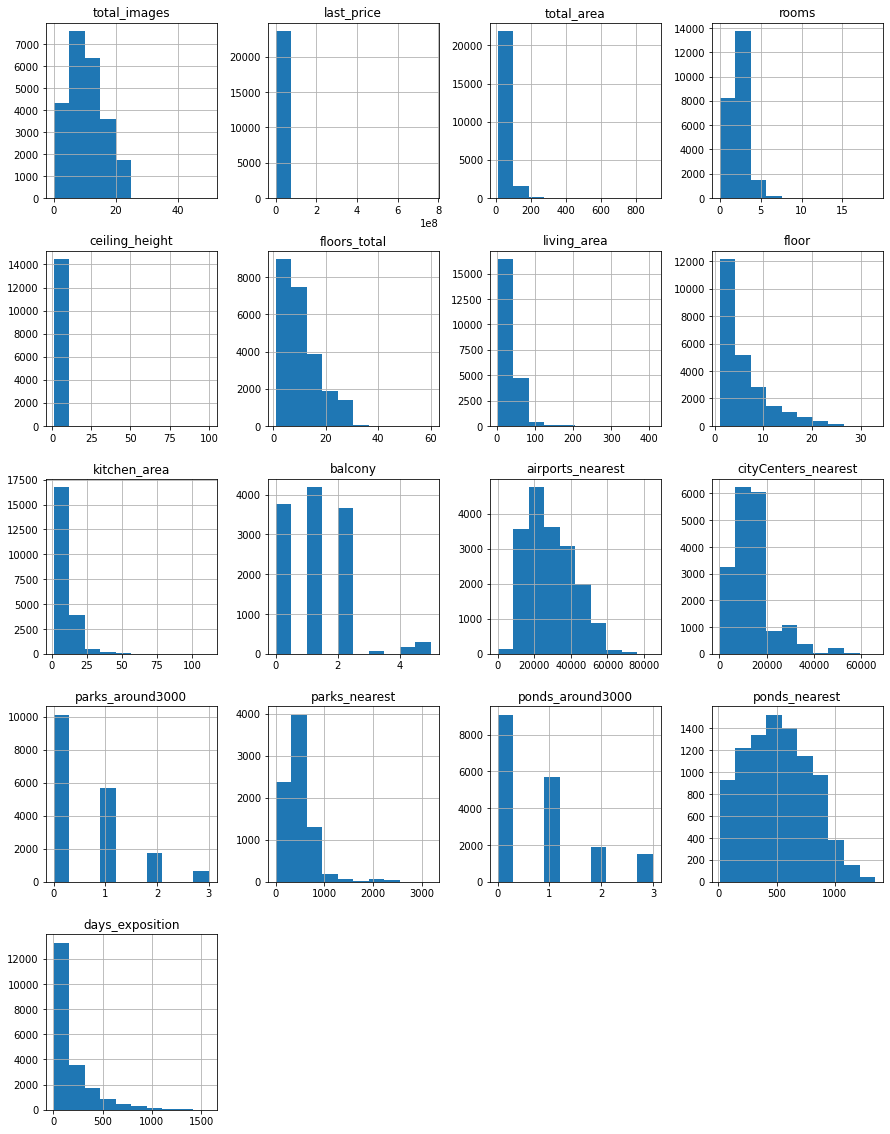

In [6]:
data.hist(figsize=(15,20));

In [7]:
data.describe()

total_images    last_price    total_area         rooms  ceiling_height  \
count  23699.000000  2.369900e+04  23699.000000  23699.000000    14504.000000   
mean       9.858475  6.541549e+06     60.348651      2.070636        2.771499   
std        5.682529  1.088701e+07     35.654083      1.078405        1.261056   
min        0.000000  1.219000e+04     12.000000      0.000000        1.000000   
25%        6.000000  3.400000e+06     40.000000      1.000000        2.520000   
50%        9.000000  4.650000e+06     52.000000      2.000000        2.650000   
75%       14.000000  6.800000e+06     69.900000      3.000000        2.800000   
max       50.000000  7.630000e+08    900.000000     19.000000      100.000000   

       floors_total   living_area         floor  kitchen_area       balcony  \
count  23613.000000  21796.000000  23699.000000  21421.000000  12180.000000   
mean      10.673824     34.457852      5.892358     10.569807      1.150082   
std        6.597173     22.030445      4.885249      5.905438      1.071300   
min        1.000000      2.000000      1.000000      1.300000      0.000000   
25%        5.000000     18.600000      2.000000      7.000000      0.000000   
50%        9.000000     30.000000      4.000000      9.100000      1.000000   
75%       16.000000     42.300000      8.000000     12.000000      2.000000   
max       60.000000    409.700000     33.000000    112.000000      5.000000   

       airports_nearest  cityCenters_nearest  parks_around3000  parks_nearest  \
count      18157.000000         18180.000000      18181.000000    8079.000000   
mean       28793.672193         14191.277833          0.611408     490.804555   
std        12630.880622          8608.386210          0.802074     342.317995   
min            0.000000           181.000000          0.000000       1.000000   
25%        18585.000000          9238.000000          0.000000     288.000000   
50%        26726.000000         13098.500000          0.000000     455.000000   
75%        37273.000000         16293.000000          1.000000     612.000000   
max        84869.000000         65968.000000          3.000000    3190.000000   

       ponds_around3000  ponds_nearest  days_exposition  
count      18181.000000    9110.000000     20518.000000  
mean           0.770255     517.980900       180.888634  
std            0.938346     277.720643       219.727988  
min            0.000000      13.000000         1.000000  
25%            0.000000     294.000000        45.000000  
50%            1.000000     502.000000        95.000000  
75%            1.000000     729.000000       232.000000  
max            3.000000    1344.000000      1580.000000

Проблемы с пропусками,аномалиями,дубликати:

last_price - данные типа float должен быть int

first_day_exposition - дата и время записана как object должен быть datetime

ceiling_heights - есть пропуски и неправильно заисанные данные(аномалии)

floor_total - есть пропуски и данные записаны как float должен быть int

living_area - есть пропуски

is_apartment - есть пропуски

kitchen_area - есть пропуски

balcony - есть пропуски и данные типа float должен быть int

locality_name - есть пропуски, неявные дубликаты

airports_nearest - есть пропуски

cityCenters_nearest - есть пропуски,некоректно написано название столбца

parks_around3000 - есть пропуски,некоректно написано название столбца

parks_nearest - есть пропуски

ponds_around3000 - есть пропуски,некоректно написано название столбца

ponds_nearest - есть пропуски

days_exposition - есть пропуски

### Предобработка данных

In [8]:
#Узнаём сколько пропусков есть во всех таблицах
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [9]:
#Меняем названия столбцов
data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'}, inplace=True)
data.rename(columns = {'parks_around3000':'parks_around_3000'}, inplace=True)
data.rename(columns = {'ponds_around3000':'ponds_around_3000'}, inplace=True)

In [10]:
#Меняем тип данных из object в Datetime
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [11]:
#Заполняем пропуски типа булевого значения на False
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [12]:
#Удаляем строки с пропусками. Пропуски составляют 0.2%.
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
#Заполняем пропущенные значения и меняем тип данных
data['last_price'] = data['last_price'].astype('int')
data['balcony'] = data['balcony'].fillna(value=0).astype('int')
data['parks_around_3000'] = data['parks_around_3000'].fillna(value=0).astype('int')
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(value=0).astype('int')
#data['days_exposition'] = data['days_exposition'].fillna(value=0).astype('int')
data['floors_total'] = data['floors_total'].astype('int')
data['floor'] = data['floor'].astype('int')

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  int64         
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

In [14]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9084
floors_total                0
living_area              1865
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2222
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around_3000           0
parks_nearest           15535
ponds_around_3000           0
ponds_nearest           14529
days_exposition          3171
dtype: int64

В файле есть пропущенные значения категориального(и булевые) и количественные.
В тех столбцах которые не повлияют на расчёта поменяли эти значения на 0,при булевой значении на False. К примеру в столбце balcony логично пропуски и есть отсуствие балконов.Или days_exposition либо в этот же день продалось,либо снято из обявления.
Удалили строки с пропусками в столбцах locality_name и floors_total(не смогли бы поработать с этими строками).

Были столбцы с неправильными типа данных.Названия в столбцах cityCenters_nearest поменяли на city_centers_nearest,parks_around3000 на parks_around_3000,ponds_around3000 на ponds_around_3000
Cтолбец first_day_exposition, был записан,как  object, поменяли  на формат datetime.
В столбцах last_price,balcony,parks_around_3000,ponds_around_3000 поменяли данные типа float на тип int.
В столбце  floors_total и floor поменяли тип float на int.

In [15]:
#выводим информацию о неявных дубликатов
data['locality_name'].value_counts()

Санкт-Петербург                  15651
посёлок Мурино                     520
посёлок Шушары                     439
Всеволожск                         398
Пушкин                             369
                                 ...  
посёлок Ропша                        1
деревня Каськово                     1
поселок Пансионат Зелёный Бор        1
поселок Коммунары                    1
деревня Новолисино                   1
Name: locality_name, Length: 364, dtype: int64

In [16]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [17]:
#исправляем названии локации
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа','городской поселок',  regex=True)

In [18]:
data['locality_name'].value_counts()

Санкт-Петербург                               15651
поселок Мурино                                  552
поселок Шушары                                  439
Всеволожск                                      398
Пушкин                                          369
                                              ...  
садовое товарищество Новая Ропша                  1
поселок при железнодорожной станции Вещево        1
поселок Рабитицы                                  1
деревня Реброво                                   1
деревня Снегиревка                                1
Name: locality_name, Length: 323, dtype: int64

In [19]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'городской поселок Красный Бор', 'Гатчина', 'деревня Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'городской поселок Лебяжье',
       'городской поселок Сиверский', 'поселок Молодцово',
       'городской поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'городской поселок Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 

Были дубликаты в столбце locality_name. Были те же населёные пункты, просто написаны по разному. 

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

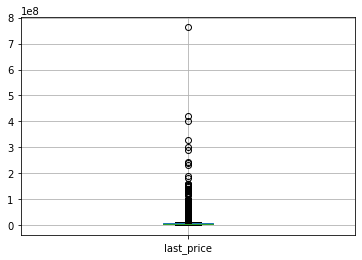

In [20]:
#получаем диаграмму размаха
data.boxplot('last_price')
data['last_price'].describe()

count    14481.000000
mean         2.771283
std          1.261983
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

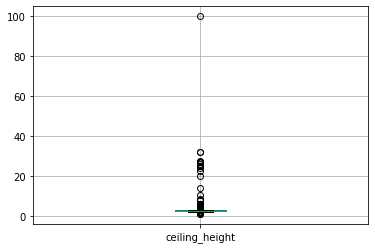

In [21]:
data.boxplot('ceiling_height')
data['ceiling_height'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

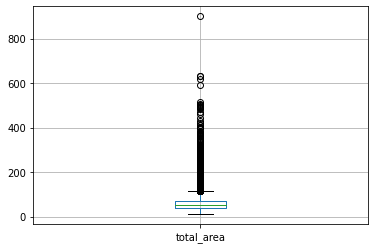

In [22]:
data.boxplot('total_area')
data['total_area'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

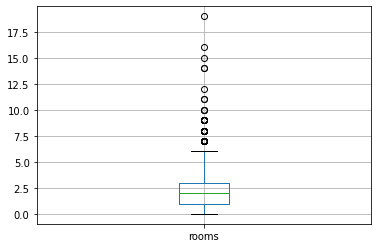

In [23]:
data.boxplot('rooms')
data['rooms'].describe()

count    23565.000000
mean        10.675875
std          6.594823
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

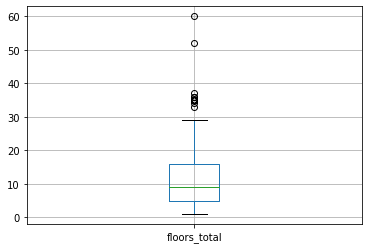

In [24]:
data.boxplot('floors_total')
data['floors_total'].describe()

count    21700.000000
mean        34.454822
std         22.045359
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

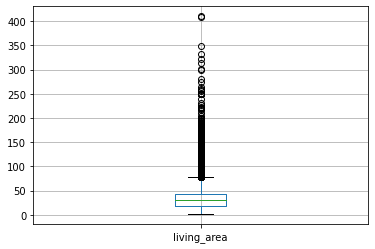

In [25]:
data.boxplot('living_area')
data['living_area'].describe()

count    23565.000000
mean         5.878124
std          4.871485
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

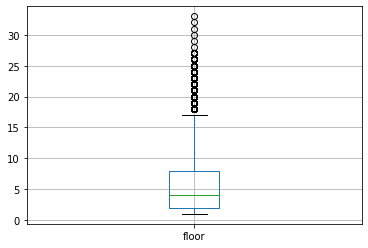

In [26]:
data.boxplot('floor')
data['floor'].describe()

count    21343.000000
mean        10.560994
std          5.900630
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

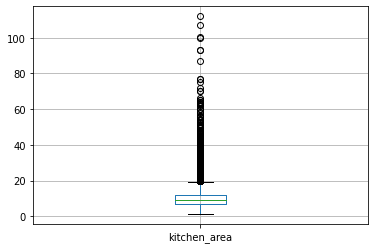

In [27]:
data.boxplot('kitchen_area')
data['kitchen_area'].describe()

count    23565.000000
mean         0.593677
std          0.960660
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: balcony, dtype: float64

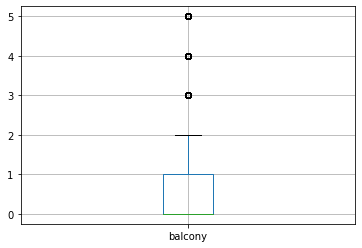

In [28]:
data.boxplot('balcony')
data['balcony'].describe()

count    18041.000000
mean     28797.082701
std      12632.499735
min          0.000000
25%      18565.000000
50%      26757.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

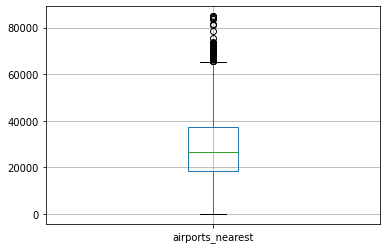

In [29]:
data.boxplot('airports_nearest')
data['airports_nearest'].describe()

count    18064.000000
mean     14192.656056
std       8613.348153
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16285.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

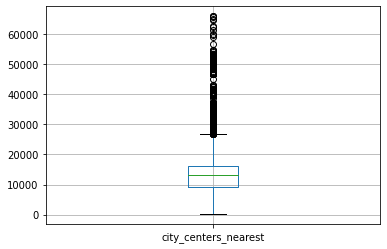

In [30]:
data.boxplot('city_centers_nearest')
data['city_centers_nearest'].describe()

count    8030.000000
mean      490.580448
std       341.572956
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

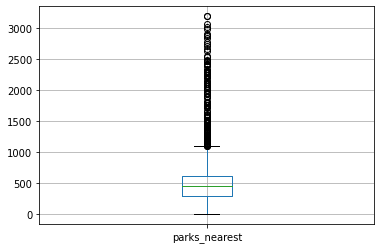

In [31]:
data.boxplot('parks_nearest')
data['parks_nearest'].describe()

count    9036.000000
mean      518.289509
std       278.009558
min        13.000000
25%       293.000000
50%       503.000000
75%       730.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

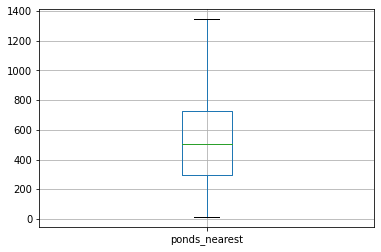

In [32]:
data.boxplot('ponds_nearest')
data['ponds_nearest'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

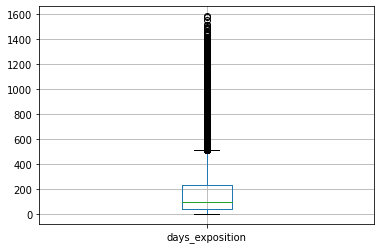

In [33]:
data.boxplot('days_exposition')
data['days_exposition'].describe()

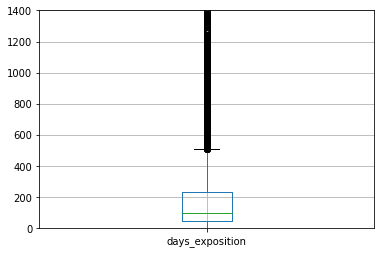

In [34]:
#получаем срез до 1400 и создаём график
data.boxplot('days_exposition')
plt.ylim(0,1400)
data = data.query('days_exposition <= 1400')

По графикам видно что есть выбросы. Но пока ничего не меняю. посморим по глубже и тогда поменяем.Только по дням объявлении плучили срез.

### Посчитайте и добавьте в таблицу новые столбцы

In [35]:

#добавляем новый столбец цена за1 квм
data['price_one_qm'] = data['last_price']/data['total_area']
#округляем до двух цифр после запятой
data['price_one_qm'] = data['price_one_qm'].round(2)
data.sort_values('price_one_qm', ascending=False)


total_images  last_price  total_area first_day_exposition  rooms  \
12971            19   763000000       400.0           2017-09-30      7   
1436             19   330000000       190.0           2018-04-04      3   
14706            15   401300000       401.0           2016-02-20      5   
4996             20   124000000       124.5           2017-10-12      4   
16461            17   245000000       285.7           2017-04-10      6   
...             ...         ...         ...                  ...    ...   
9581              7      450000        43.4           2018-08-31      2   
11351            17      550000        54.0           2019-02-07      2   
4405              9      500000        52.0           2018-08-02      2   
14911             5      430000        54.0           2018-06-26      2   
8793              7       12190       109.0           2019-03-20      2   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
12971             NaN            10        250.0     10         False   False   
1436             3.50             7         95.0      5         False   False   
14706             NaN             9        204.0      9         False   False   
4996             3.00             4         67.2      2         False   False   
16461            3.35             7        182.8      4         False   False   
...               ...           ...          ...    ...           ...     ...   
9581              NaN             5         30.3      3         False   False   
11351            3.00             2         40.0      1         False   False   
4405             2.70             2         31.0      1         False   False   
14911             NaN             3          NaN      3         False   False   
8793             2.75            25         32.0     25         False   False   

       open_plan  kitchen_area  balcony          locality_name  \
12971      False           NaN        2        Санкт-Петербург   
1436       False          40.0        0        Санкт-Петербург   
14706      False          24.0        3        Санкт-Петербург   
4996       False          20.0        0        Санкт-Петербург   
16461      False          29.8        0        Санкт-Петербург   
...          ...           ...      ...                    ...   
9581       False           5.5        0     деревня Старополье   
11351      False           7.5        0                 Сланцы   
4405       False           8.0        0                 Сланцы   
14911      False           NaN        0  поселок станции Свирь   
8793       False          40.5        0        Санкт-Петербург   

       airports_nearest  city_centers_nearest  parks_around_3000  \
12971           25108.0                3956.0                  1   
1436            23011.0                1197.0                  3   
14706           21912.0                2389.0                  1   
4996            20399.0                1722.0                  3   
16461           33143.0                6235.0                  3   
...                 ...                   ...                ...   
9581                NaN                   NaN                  0   
11351               NaN                   NaN                  0   
4405                NaN                   NaN                  0   
14911               NaN                   NaN                  0   
8793            36421.0                9176.0                  1   

       parks_nearest  ponds_around_3000  ponds_nearest  days_exposition  \
12971          530.0                  3          756.0             33.0   
1436           519.0                  3          285.0            233.0   
14706          545.0                  1          478.0            393.0   
4996           302.0                  3          172.0             45.0   
16461          400.0                  3          140.0            249.0   
...              ...                ...            ...              ...  

In [36]:
#добавляем столбец день недели публикации
data['week_exp'] = data['first_day_exposition'].dt.weekday

In [37]:
#добавляем столбец месяц публикации
data['month_exp'] = data['first_day_exposition'].dt.month

In [38]:
#добавляем столбец год публикации
data['year_exp'] = data['first_day_exposition'].dt.year

In [39]:
#создаём цикл для типа квартир и добавляем результат в новый столбец
def floor_number(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
    
data['floor_number'] = data.apply(floor_number, axis=1)

In [40]:
#меняем значение столбца на км и добовлям в новый столбец
data['city_centers_nearest_km'] = round(data['city_centers_nearest']/1000)
data.sort_values('city_centers_nearest_km',ascending=False)

total_images  last_price  total_area first_day_exposition  rooms  \
9640              8     4200000        51.4           2014-12-10      2   
20746             1     3300000        43.5           2016-02-16      2   
5218             15     3650000        53.8           2018-09-24      3   
18884            15     3600000        57.6           2019-02-08      3   
2974             13     3200000        46.3           2018-03-31      2   
...             ...         ...         ...                  ...    ...   
23677             8     2450000        35.0           2018-10-26      1   
23679             0     2500000        35.0           2017-12-08      1   
23682            11     2350000        35.6           2016-06-23      1   
23692             2     1350000        30.0           2017-07-07      1   
23695            14     3100000        59.0           2018-01-15      3   

       ceiling_height  floors_total  living_area  floor  is_apartment  studio  \
9640             2.55             5         31.0      2         False   False   
20746            2.55             4         27.2      2         False   False   
5218             2.50             4         36.9      3         False   False   
18884            2.55             3         41.3      2         False   False   
2974             2.50             3         29.2      2         False   False   
...               ...           ...          ...    ...           ...     ...   
23677            2.60             5         18.0      4         False   False   
23679             NaN             9          NaN      4         False   False   
23682            2.50             5         17.0      4         False   False   
23692             NaN             5         17.5      4         False   False   
23695             NaN             5         38.0      4         False   False   

       open_plan  kitchen_area  balcony       locality_name  airports_nearest  \
9640       False           6.0        1  поселок Молодежное           84869.0   
20746      False           5.0        1  поселок Молодежное           84006.0   
5218       False           5.2        0  поселок Молодежное           83758.0   
18884      False           6.5        1         Зеленогорск           81607.0   
2974       False           7.0        1         Зеленогорск           81355.0   
...          ...           ...      ...                 ...               ...   
23677      False           9.6        0          Всеволожск               NaN   
23679      False           NaN        0        Сосновый Бор               NaN   
23682      False           8.3        2              Выборг               NaN   
23692      False           6.0        0              Тихвин               NaN   
23695      False           8.5        0               Тосно               NaN   

       city_centers_nearest  parks_around_3000  parks_nearest  \
9640                65968.0                  0            NaN   
20746               65105.0                  0            NaN   
5218                64857.0                  0            NaN   
18884               62706.0                  0            NaN   
2974                62454.0                  0            NaN   
...                     ...                ...            ...   
23677                   NaN                  0            NaN   
23679                   NaN                  0            NaN   
23682                   NaN                  0            NaN   
23692                   NaN                  0            NaN   
23695                   NaN                  0            NaN   

       ponds_around_3000  ponds_nearest  days_exposition  price_one_qm  \
9640                   0            NaN           1194.0      81712.06   
20746                  0            NaN           1043.0      75862.07   
5218                   0            NaN            121.0      67843.87   
18884                  0            NaN             13.0      62500.00   
2974     

По этим новым столбцам получим графики по зависимости.

### Проведите исследовательский анализ данных

count    20375.000000
mean        58.806973
std         34.044991
min         12.000000
25%         39.500000
50%         50.700000
75%         67.700000
max        900.000000
Name: total_area, dtype: float64

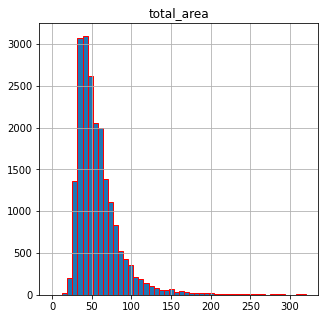

In [41]:
#получаем гистограмму
data.hist('total_area', bins=50, range=(0,320), figsize=(5,5), ec='red')
data['total_area'].describe()

Тут более высокие значения тянятся к хвосту, оставляем так,ка есть.

count    18706.000000
mean        33.513626
std         21.319991
min          2.000000
25%         18.300000
50%         30.000000
75%         41.500000
max        409.700000
Name: living_area, dtype: float64

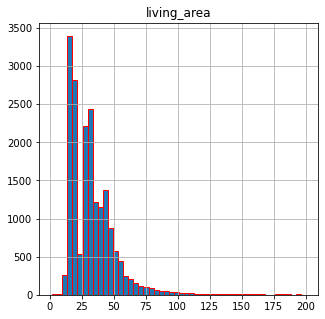

In [42]:
data.hist('living_area', bins=50, range=(2,200), figsize=(5,5), ec='red')
data['living_area'].describe()

Тут такая же ситуация, оставляем.

count    18353.000000
mean        10.421797
std          5.669199
min          2.000000
25%          7.000000
50%          9.080000
75%         11.900000
max        112.000000
Name: kitchen_area, dtype: float64

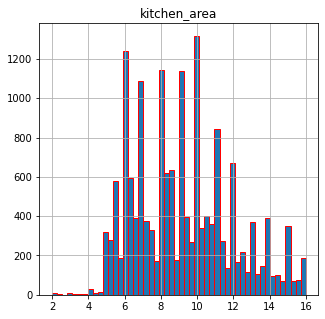

In [43]:
data.hist('kitchen_area', bins=50, range=(2,16), figsize=(5,5), ec='red')
data['kitchen_area'].describe()

Есть и кухни больше 100квм, но может быть так, что это общая кухня и гостинная, думаю ненжно удалить эти данные.

count    20375.000000
mean         6.259263
std         10.890220
min          0.012190
25%          3.400000
50%          4.500000
75%          6.500000
max        763.000000
Name: last_price, dtype: float64

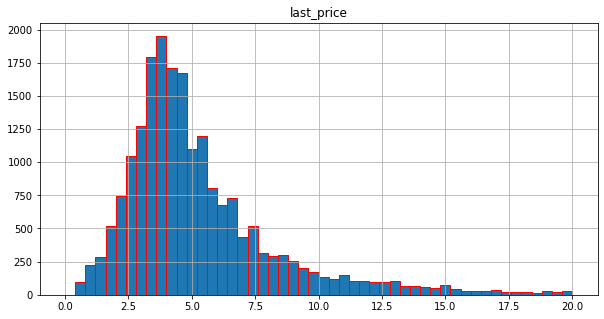

In [44]:
#оставляем цену до 20000000, разделяем значении в столбце на 1000000 и получаем гистограмму
data.query('last_price < 20000000')
data['last_price'] /= 1000000
data.hist('last_price', bins=50, range=(0,20),figsize=(10,5), ec='red')
data['last_price'].describe()

Тут встречаются редкие цифры после 20000000,сделали срез до 20000000.

count    19987.000000
mean         1.952269
std          0.905924
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: rooms, dtype: float64

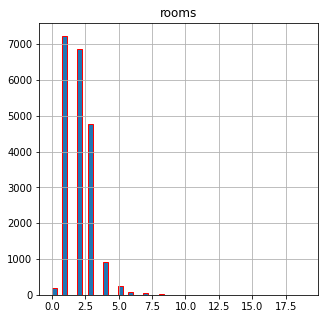

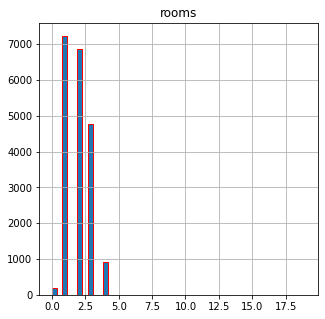

In [45]:
#получим гистограмму срезом до 5 комнат
data.hist('rooms', bins=50, range=(0,19), figsize=(5,5), ec='red')
data['rooms'].describe()
data = data.query('rooms < 5')
data.hist('rooms', bins=50, range=(0,19), figsize=(5,5), ec='red')
data['rooms'].describe()

Есть редкие значения выше 5 комнат, сделали срез до 5 комнат.

In [46]:
#заполняем отсутсвуюшие поля в таблице 
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data['ceiling_height'].isna().sum()

0

Заполнила пропуски

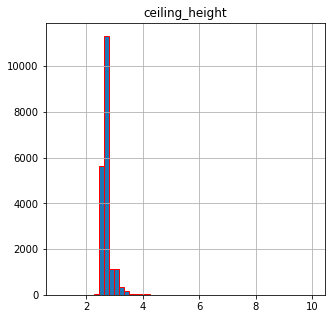

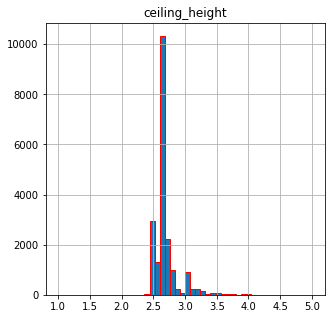

In [47]:
#получим гистограмму потолки до 5м
data.hist('ceiling_height', bins=(50), range=(1,10), figsize=(5,5), ec='red');
data['ceiling_height'].describe()
data = data.query('ceiling_height <= 5')#Получим срез данных где потолки до 5м
data.hist('ceiling_height', bins=(50), range=(1,5), figsize=(5,5), ec='red');

Потолки так же посчитаем до 5м

count      19961
unique         3
top       другой
freq       14838
Name: floor_number, dtype: object

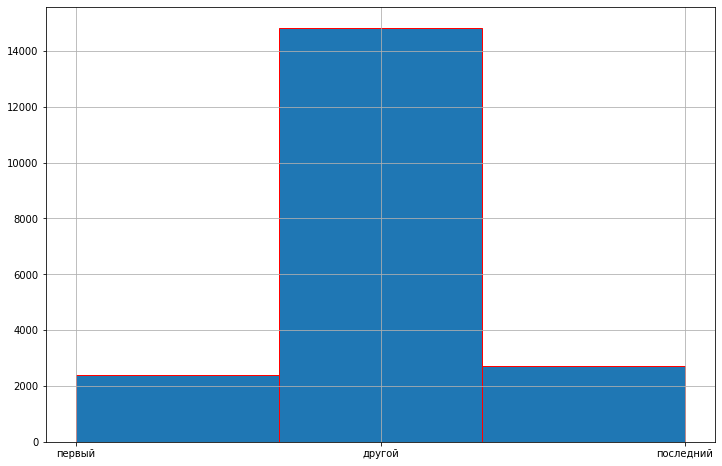

In [48]:
data['floor_number'].hist(bins=(3), figsize=(12,8), ec='red')
data['floor_number'].describe()

Тут оставляем так,как есть. Большинство квартир находится между первыми и последними этажами.

count    19961.000000
mean        10.949902
std          6.659098
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

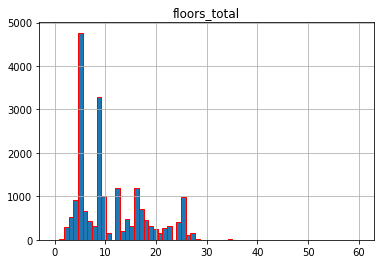

In [49]:
#получаем гистограмму
data.hist('floors_total', bins=65, range=(0,60), ec='red')
data['floors_total'].describe()

После 30и есть редкие значения.

count    15353.000000
mean        14.480102
std          8.525367
min          0.000000
25%         10.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: city_centers_nearest_km, dtype: float64

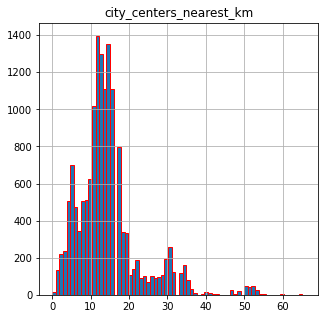

In [50]:
#получаем гистогрмму
data.hist('city_centers_nearest_km', bins=70, range=(0,66), figsize=(5,5),ec='red')
data['city_centers_nearest_km'].describe()

Есть редкие значения после 40км.

count    6613.000000
mean      493.336458
std       346.201811
min         1.000000
25%       288.000000
50%       456.000000
75%       617.000000
max      3190.000000
Name: parks_nearest, dtype: float64

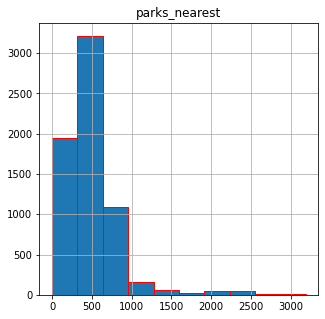

In [51]:
#построим график
data.hist('parks_nearest', bins=10, range=(0,3190), figsize=(5,5),ec='red')
data['parks_nearest'].describe()

Так же есть редкие значения, тянутся к хвосту

count    19961.000000
mean       177.301338
std        213.763823
min          1.000000
25%         44.000000
50%         94.000000
75%        227.000000
max       1396.000000
Name: days_exposition, dtype: float64

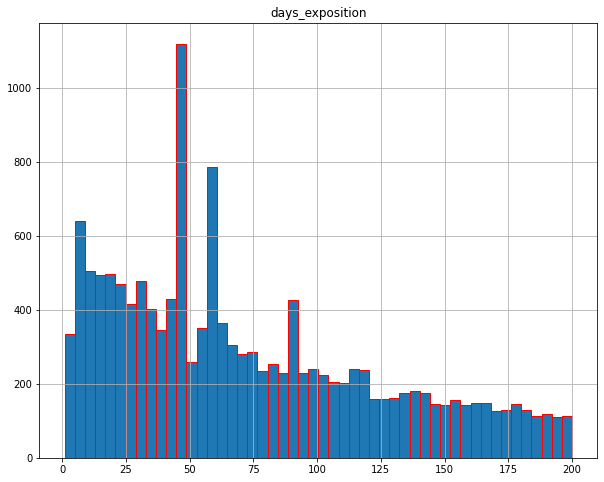

In [52]:
data.hist('days_exposition', bins=50, range=(1,200), figsize=(10,8), ec='red')
data['days_exposition'].describe()

In [53]:
#получаем медиану
data['days_exposition'].median()

94.0

In [54]:
#получаем среднее
data['days_exposition'].mean()

177.30133760833627

count    19961.000000
mean         2.584790
std          1.784182
min          0.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: week_exp, dtype: float64

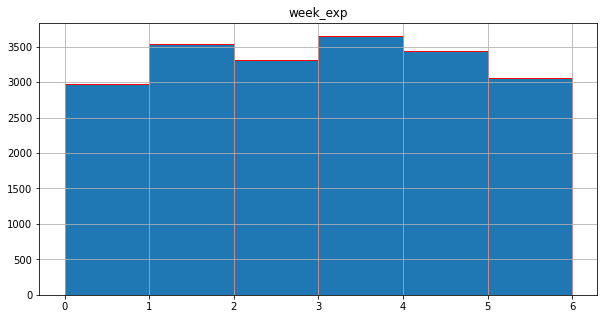

In [55]:
#получаем гистограмму по дням
data.hist('week_exp', bins=6, range=(0,6), figsize=(10,5),ec='red')
data['week_exp'].describe()

In [56]:
#получаем медиану
data['week_exp'].median()

3.0

In [57]:
#получаем среднее
data['week_exp'].mean()

2.5847903411652724

count    19961.000000
mean         6.587546
std          3.487390
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: month_exp, dtype: float64

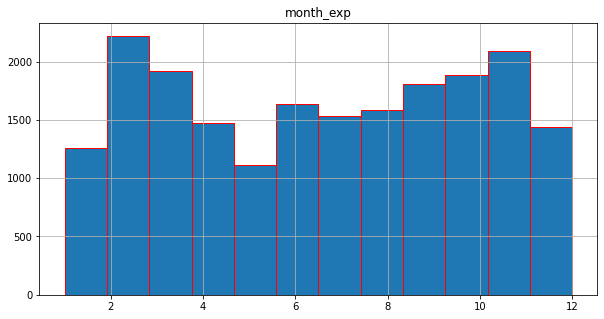

In [58]:
#получаем гистограмму по месяцам
data.hist('month_exp', bins=12, range=(1,12), figsize=(10,5), ec='red')
data['month_exp'].describe()

In [59]:
#получаем медиану
data['month_exp'].median()

7.0

In [60]:
#получаем среднее
data['month_exp'].mean()

6.587545714142578

По графикам видно, что большинство обявлении идут в убывание до конца года(то есть снимаются с объявлении). По дням со вт. до чт. растёт число обьявлении,но кореляция между днями не большая. По дням среднее значение 177д.,медиана получается 94. Есть дни, когда объвления резко снимаются(49,60,90), можно уточнить связан ли это с продажой или программой.
После июня добавляются обявления, до последнего месяца,в декабре такая же ситуация объявления снимаются.По скольку медиана 94 дня,дольше 3х месяцев посчитаем долгие продажи.

0.6708674510822633

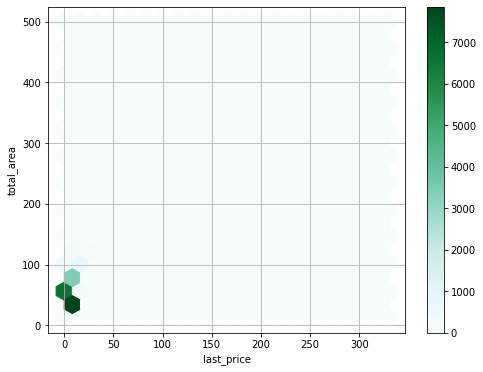

In [61]:
#получаем график по корреляции
data.plot(x='last_price', y='total_area', kind='hexbin', gridsize=20, figsize=(8,6), sharex=False, grid=True)
data['last_price'].corr(data['total_area'])

мы видим кореляцию по графику, то есть на сколько большая плошадь, на столько и высокая цена. 

0.546881550426427

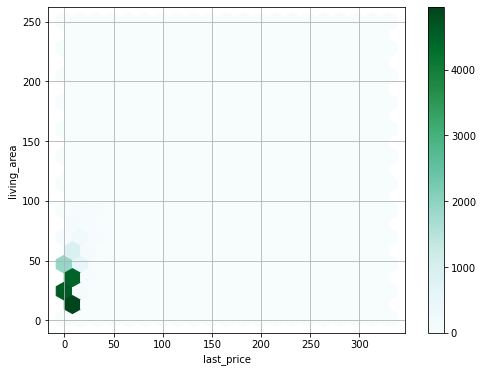

In [62]:
data.plot(x='last_price', y='living_area', kind='hexbin', gridsize=20, figsize=(8,6), sharex=False, grid=True)
data['last_price'].corr(data['living_area'])

Логично. То же самое мы видим тут. 

0.5142223877703019

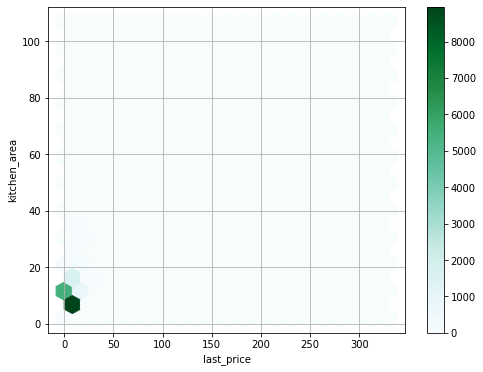

In [63]:
data.plot(x='last_price', y='kitchen_area', kind='hexbin', gridsize=20, figsize=(8,6), sharex=False, grid=True)
data['last_price'].corr(data['kitchen_area'])

Тут зависимость есть,но по меньше чем графиках выше. 

0.33681805177551954

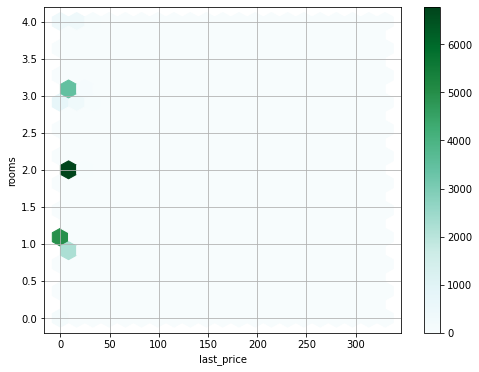

In [64]:
data.plot(x='last_price', y='rooms', kind='hexbin', gridsize=20, figsize=(8,6), sharex=False, grid=True)
data['last_price'].corr(data['rooms'])

Ситуация корреляия находится близко к нулю.

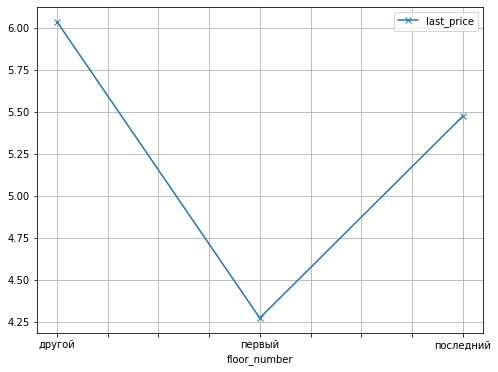

In [65]:
data.pivot_table(index='floor_number', values='last_price').plot(style='x-',figsize=(8,6), grid=True);

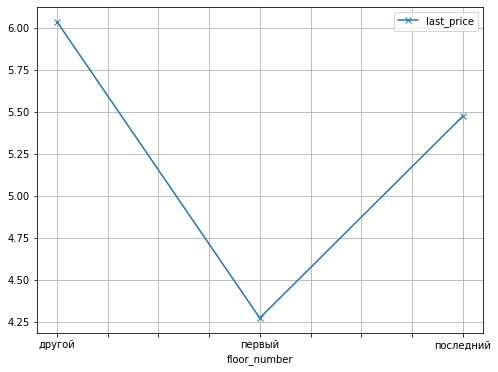

In [66]:
#получаем срез 1ого и последнего этажа, создаём сводную таблицу и получаем график по этой таблице
data.query('floor_number != "другой"')
data.pivot_table(index='floor_number', values='last_price').plot(style='x-',figsize=(8,6), grid=True);

Если я правильно понимаю квартиры на первом этаже стоят на много дешевле чем на последнем. Судя по этим двум графикам, видно что средние этажи стоят больше чем последний этаж. Зависимость есть.

-0.00018909671279391315

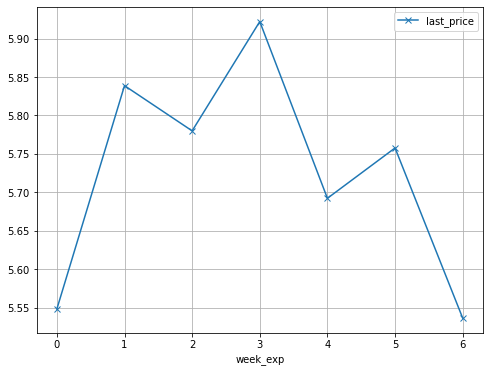

In [67]:
data.pivot_table(index='week_exp', values='last_price').plot(style='x-',figsize=(8,6), grid=True)
data['last_price'].corr(data['week_exp'])

По корреляции видим, что он близко к 0. Видим,что по вторникам пик цены, а по пн., и субботам низкая цена.Получается, это начало недели и ближе к концу недели. Может это связанно с тем что спроса мало в понедельник, всё так и это начало рабочой недели, а суббота, это первый выходной день.

0.0009571428214398455

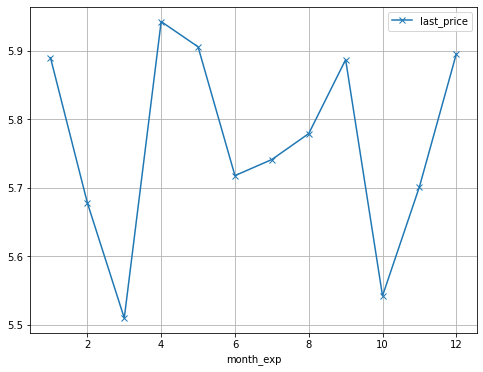

In [68]:
data.pivot_table(index='month_exp', values='last_price').plot(style='x-',figsize=(8,6), grid=True)
data['last_price'].corr(data['month_exp'])

Да корреляция ближе к 0-у.Самая низкаяцена в Мае, может связано с праздникам,в этом месяце очень мало рабочих дней. Но видно что пик это Июнь. По информации покупка и продажа недвижимости более активна летом, в Июнеи и в Июле.

-0.06778822803000417

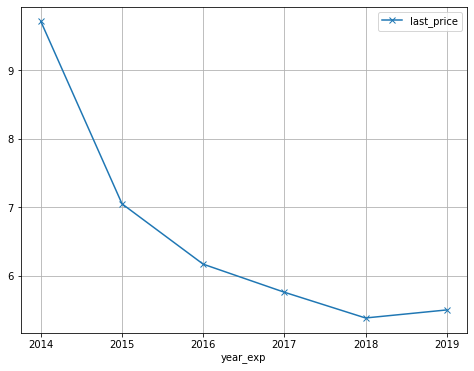

In [69]:
data.pivot_table(index='year_exp', values='last_price').plot(style='x-',figsize=(8,6), grid=True)
data['last_price'].corr(data['year_exp'])

То же самое и по годам. Но тут конечно можно отметить что, в период 14ого до 17ого года неясная ситуация, может был спад на рынке недвижимости. Самая низкая цена была в 18ом году.
Информация из инета:
В 2018 г. долларовый индекс стоимости жилья снизился на 8,3%, до отметки в $2 600 за квадратный метр. При этом в рубле, сильно ослабевшем в 2018 г., цены выросли - на скромные 3,4%, до 172 300 за «квадрат». Но это в среднем. Рост цен практически в течение всего года был очень неравномерным – рынок толкали вверх в основном недорогие сегменты.

In [70]:
#создаём сводную таблицу по столбцам locality_name и price_one_qm с количеством объявлении и среднем по цене за квм
local_price_pivot = data.pivot_table(index='locality_name', values='price_one_qm', aggfunc=('count','mean'))
local_price_pivot.columns = ['count','mean'] 
local_price_pivot = local_price_pivot.sort_values('count', ascending=False).head(10)
local_price_pivot

count           mean
locality_name                          
Санкт-Петербург    13189  111396.464656
поселок Мурино       543   85747.941455
поселок Шушары       405   77905.192346
Всеволожск           338   68589.253047
Колпино              306   74801.807320
Пушкин               302  102047.574536
поселок Парголово    300   89591.386933
деревня Кудрово      299   92473.547559
Гатчина              266   67994.751729
Выборг               207   57155.654251

In [71]:
local_price_pivot[local_price_pivot['mean'] == local_price_pivot['mean'].min() ]

count          mean
locality_name                     
Выборг           207  57155.654251

In [72]:
local_price_pivot[local_price_pivot['mean'] == local_price_pivot['mean'].max()]

count           mean
locality_name                        
Санкт-Петербург  13189  111396.464656

Самое большое количество объявлении в Санкт-Петербурге.Самая  низкая цена в Выборге, самая высокая цена в Санкт-Петрбурге, разница  на почти 2,5 раз.

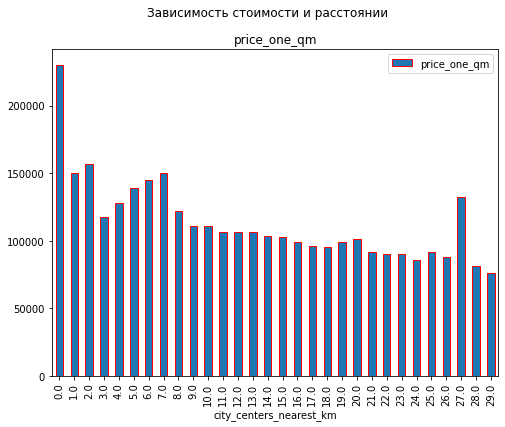

In [74]:
spb_plot = data.query('locality_name == "Санкт-Петербург"')
spb_plot.pivot_table(index='city_centers_nearest_km', values='price_one_qm', aggfunc='mean' ).plot(title='Зависимость стоимости и расстоянии', ec='red', kind='bar', figsize=(8,6), subplots=True);

Ну можно сказать так. Чем ближе к центру тем дороже.Но есть города в которых стоимость недвижимости дорогая. Но я так думаю, что в этих городох влияют другие факторы. Как написала выше к примеру находится близко к аэрапорту или известный город, население большое, хорошая инфроструктура и т.д..

### Общий вывод

###### Вывод
Изучили данные там где нужно было поменять тип данных поменяли.Выявили пропуски,местами заполнили,там где было возможно. Удалили строки с пропусками в столбцах locality_name и floors_total.Удалили  аномалии. Получили гистограмму, диаграмму размаха.Выявили очень редкие значения.Получили срезы по данным без редких значений,там где возможно было. Создали новые таблицы, что бы потом получить графики зависимости.
Узнали что норма срока объявлении варируется в среднем до 177 дней, по медиане до 94 дня. По графиком зависимости: цена зависит от общей площади,жилой площади,этажности,площади кухни. По дням и месяцам, такой кореляции не видно было(не сказать что вобще нету).А вот по поводу зависимости от года, есть информация ,что до 2017 года был спад на рынке недвижимости, но по данным это никак не повлияло на цены в Санкт-Петребурге.Узнали ,что расстояние до центра влияет на цену(центр городо заканчивается примерно на 7-8км-е).Получили названии населённых пунктов с самой высокой ценой на квм и количеством объявлении,это Санкт-Петербург  и самой низкой ценой,это Выборг. В этом случае думаю влияет на цену локация населёного пункта.